In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import objects as so

# EDA

### GDP

In [2]:
GDP_df = pd.read_csv("data/GDP.csv")
mortality_df= pd.read_csv("data/LifeExpectancy.csv")

In [3]:
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    225 non-null    object
 1   Series Code    225 non-null    object
 2   Country Name   225 non-null    object
 3   Country Code   225 non-null    object
 4   1990 [YR1990]  225 non-null    object
 5   2000 [YR2000]  225 non-null    object
 6   2012 [YR2012]  225 non-null    object
 7   2013 [YR2013]  225 non-null    object
 8   2014 [YR2014]  225 non-null    object
 9   2015 [YR2015]  225 non-null    object
 10  2016 [YR2016]  225 non-null    object
 11  2017 [YR2017]  225 non-null    object
 12  2018 [YR2018]  225 non-null    object
 13  2019 [YR2019]  225 non-null    object
 14  2020 [YR2020]  225 non-null    object
 15  2021 [YR2021]  225 non-null    object
dtypes: object(16)
memory usage: 28.3+ KB


In [4]:
#Drop years before 2012 until 2015
GDP_df = GDP_df.drop(["Series Name" ,"Series Code" , "Country Code" , "1990 [YR1990]" , "2000 [YR2000]", "2016 [YR2016]" ,  "2017 [YR2017]" , "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]" , "2021 [YR2021]"   ] , axis=1)

In [5]:
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   225 non-null    object
 1   2012 [YR2012]  225 non-null    object
 2   2013 [YR2013]  225 non-null    object
 3   2014 [YR2014]  225 non-null    object
 4   2015 [YR2015]  225 non-null    object
dtypes: object(5)
memory usage: 8.9+ KB


In [6]:
#Rename to join aftwerwards
GDP_df = GDP_df.rename(columns={"2012 [YR2012]" : "2012", "2013 [YR2013]" : "2013" ,"2014 [YR2014]" : "2014" , "2015 [YR2015]" : "2015"})
GDP_df

,Country Name,2012,2013,2014,2015
0,East Asia & Pacific (IDA total),..,..,..,..
1,Europe & Central Asia (IDA total),..,..,..,..
2,IBRD only,..,..,..,..
3,IDA total,..,..,..,..
4,Latin America & Caribbean (IDA total),..,..,..,..
...,...,...,...,...,...
220,Virgin Islands (U.S.),..,..,..,..
221,West Bank and Gaza,..,..,..,..
222,"Yemen, Rep.",0.0229988,0.0224915,0.0244051,0.0220426
223,Zambia,0.3491704,0.3276101,0.344746,0.3913834


In [7]:
GDP_df.replace('..', np.nan, inplace=True)
GDP_df.dropna(inplace=True)

# Set Country Name as index
GDP_df.set_index('Country Name', inplace=True)


In [8]:
GDP_df

,2012,2013,2014,2015
Country Name,,,,
Albania,0.0646113,0.0697389,0.0718166,0.0694661
Algeria,0.0449729,0.0275894,0.0262429,0.0340705
Angola,0.0196872,0.0123693,0.0158326,0.0148889
Antigua and Barbuda,1.410904,1.576889,1.521917,1.658562
Argentina,0.3999306,0.4116948,0.403086,0.4138435
...,...,...,...,...
Uzbekistan,0.0073427,0.0081887,0.0121448,0.0158465
"Venezuela, RB",0.1253704,0.1223195,0.123751,0.124222
Vietnam,0.5668527,0.6508918,0.6939729,0.9127665


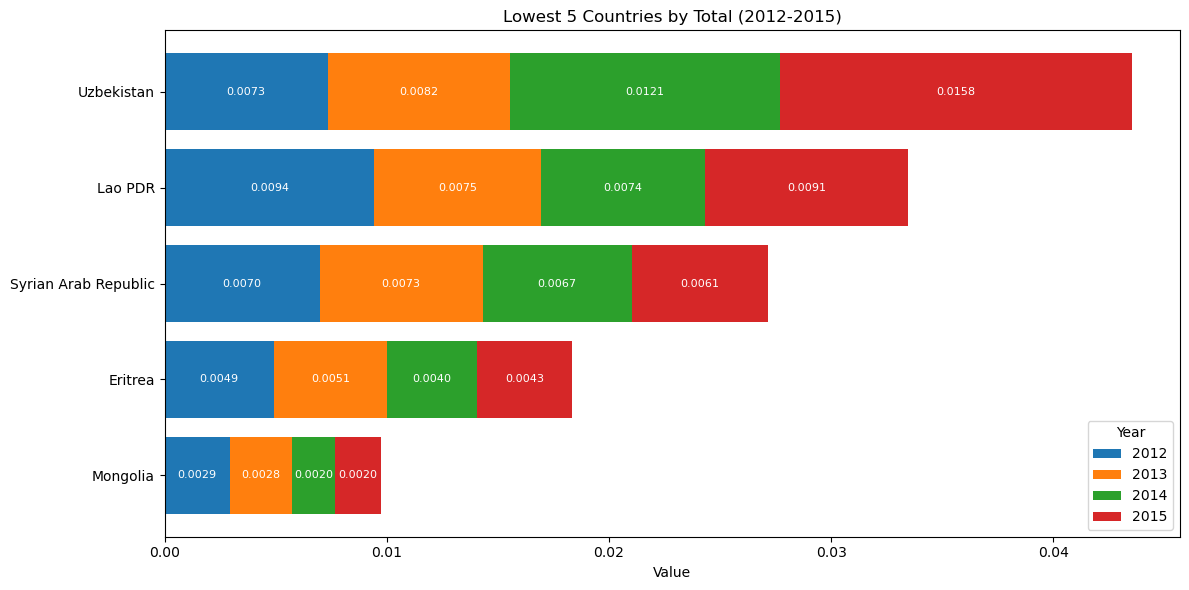

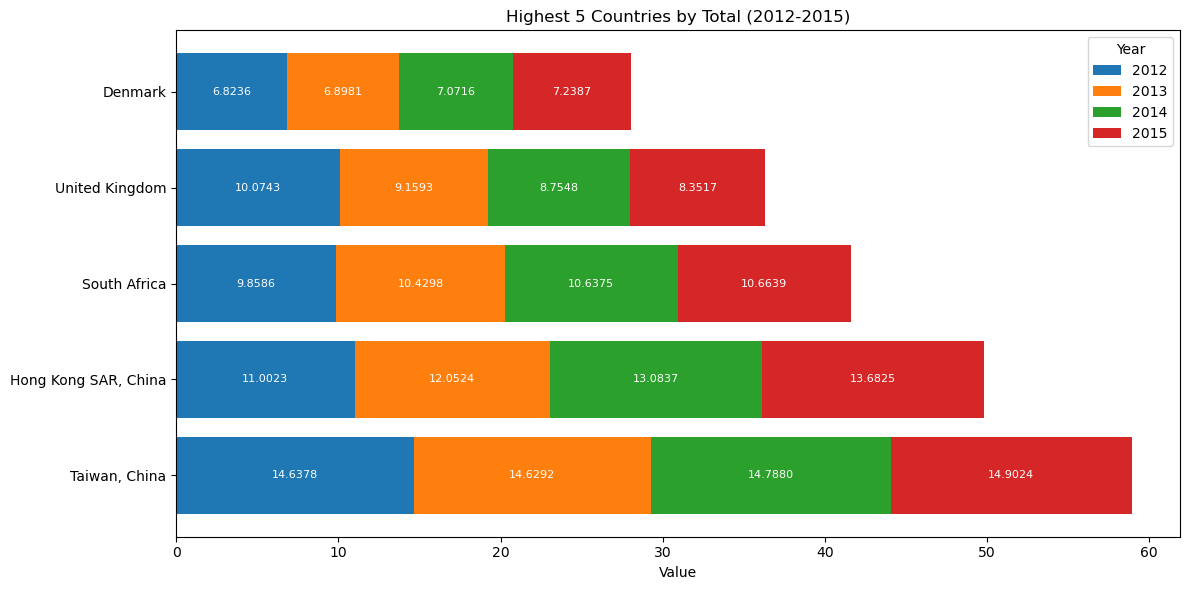

In [9]:
# Step 1: Ensure values are numeric
year_columns = ['2012', '2013', '2014', '2015']
GDP_df[year_columns] = GDP_df[year_columns].apply(pd.to_numeric, errors='coerce')

# Step 2: Create a 'Total' column
GDP_df['Total'] = GDP_df[year_columns].sum(axis=1, skipna=True)

# Step 3: Drop rows with no numeric data
GDP_df_valid = GDP_df.dropna(subset=['Total'])

# Step 4: Sort and get top/bottom 5
lowest_5 = GDP_df_valid.nsmallest(5, 'Total')
highest_5 = GDP_df_valid.nlargest(5, 'Total')

# Plotting function
def plot_stacked_horizontal(df_subset, title):
    data = df_subset[year_columns].values
    countries = df_subset.index
    y_pos = np.arange(len(countries))
    left = np.zeros(len(countries))

    plt.figure(figsize=(12, 6))
    for i, year in enumerate(year_columns):
        bars = plt.barh(y_pos, data[:, i], left=left, label=year)

        # Print value labels on each segment
        for bar, value in zip(bars, data[:, i]):
            if not np.isnan(value):
                plt.text(bar.get_x() + bar.get_width() / 2,
                         bar.get_y() + bar.get_height() / 2,
                         f"{value:.4f}",
                         ha='center', va='center', fontsize=8, color='white')

        left += data[:, i]

    plt.yticks(y_pos, countries, rotation=0)  # rotate country names if needed
    plt.xlabel("Value")
    plt.title(title)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

# Plot Lowest 5
plot_stacked_horizontal(lowest_5, "Lowest 5 Countries by Total (2012-2015)")

# Plot Highest 5 
plot_stacked_horizontal(highest_5, "Highest 5 Countries by Total (2012-2015)")


### Mortality

In [10]:
mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy (men)            2938 non-null   int64  
 4   Life expectancy(women)           2938 non-null   int64  
 5   Adult Mortality (men)            2938 non-null   int64  
 6   Adult Mortality (women)          2938 non-null   int64  
 7   Infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   Percentage expenditure           2938 non-null   float64
 10  Hepatitis B(men)                 2938 non-null   int64  
 11  Hepatitis B(women)               2938 non-null   int64  
 12  Measles             

In [11]:
mortality_df

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,67,69,62,85,27,4.36,0.000000,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,62,75,96,61,26,4.06,0.000000,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,50,74,55,95,25,4.43,0.000000,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,66,66,74,78,25,1.72,0.000000,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
print(mortality_df['Year'].value_counts().sort_index())

Year
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    193
2014    183
2015    183
Name: count, dtype: int64


In [13]:
mortality_df_filtered = mortality_df[mortality_df['Year'] > 2012]

In [14]:
# Filter
mortality_df = mortality_df.query('Year >= 2012')

print(mortality_df['Year'].value_counts().sort_index())


Year
2012    183
2013    193
2014    183
2015    183
Name: count, dtype: int64


In [15]:
mortality_df.shape

(742, 25)

C:\Users\Andre\AppData\Local\Temp\ipykernel_69848\2773919563.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_df_plotable['Avg Adult Mortality'] = (
C:\Users\Andre\AppData\Local\Temp\ipykernel_69848\2773919563.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_mortality = mortality_df_plotable[mortality_df['Country'].isin(top_5_countries)]
C:\Users\Andre\AppData\Local\Temp\ipykernel_69848\2773919563.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bottom_mortality = mortality_df_plotable[mortality_df['Country'].isin(bottom_5_countries)]


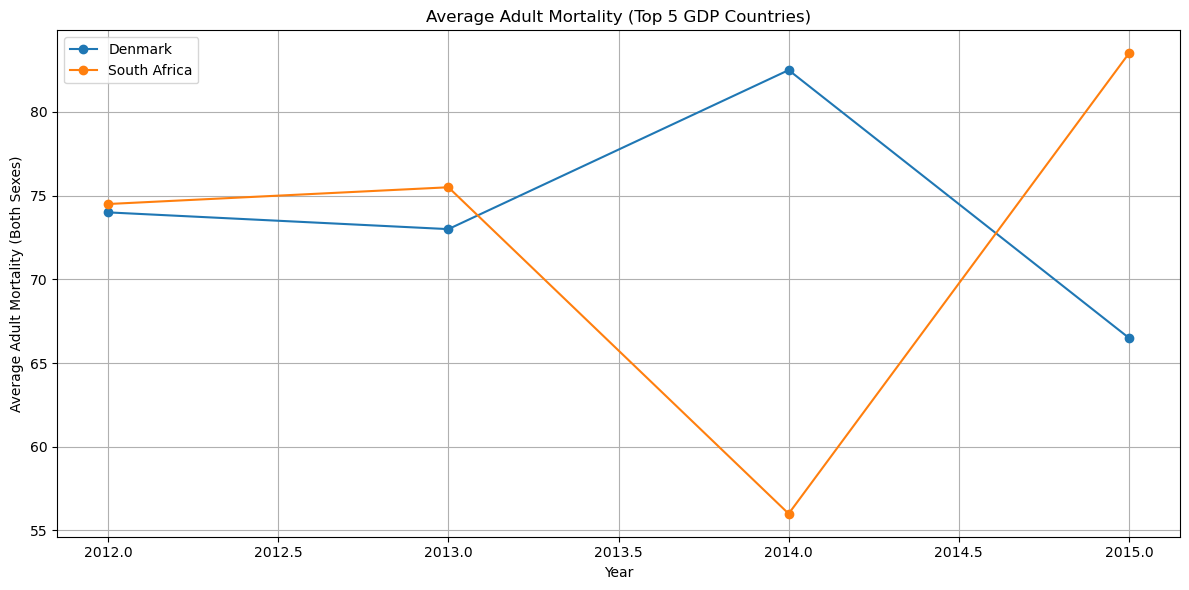

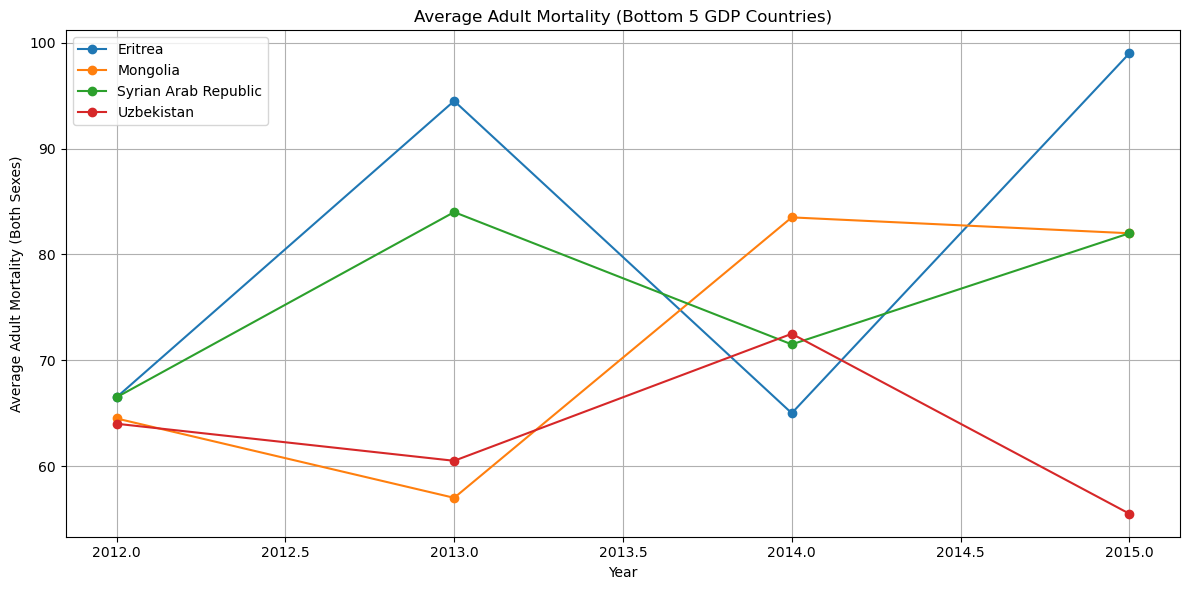

In [16]:
# List of countries based on GDP dataset
top_5_countries = highest_5.index.tolist()
bottom_5_countries = lowest_5.index.tolist()

# Filter the mortality dataset
mortality_df_plotable = mortality_df[mortality_df['Country'].isin(top_5_countries + bottom_5_countries)]

# Calculate average adult mortality for both sexes
mortality_df_plotable['Avg Adult Mortality'] = (
    mortality_df_plotable['Adult Mortality (men)'] + mortality_df_plotable['Adult Mortality (women)']
) / 2

# Separate for clarity
top_mortality = mortality_df_plotable[mortality_df['Country'].isin(top_5_countries)]
bottom_mortality = mortality_df_plotable[mortality_df['Country'].isin(bottom_5_countries)]

# Function to plot merged adult mortality over time
def plot_avg_adult_mortality(df, title):
    plt.figure(figsize=(12, 6))
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]
        plt.plot(country_data['Year'], country_data['Avg Adult Mortality'],
                 marker='o', label=country)

    plt.xlabel("Year")
    plt.ylabel("Average Adult Mortality (Both Sexes)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for top and bottom 5
plot_avg_adult_mortality(top_mortality, "Average Adult Mortality (Top 5 GDP Countries)")
plot_avg_adult_mortality(bottom_mortality, "Average Adult Mortality (Bottom 5 GDP Countries)")



In [17]:
# Step 1: Compute average life expectancy and mortality
mortality_df['Avg Life Expectancy'] = (mortality_df['Life expectancy (men)'] + mortality_df['Life expectancy(women)']) / 2
mortality_df['Avg Adult Mortality'] = (mortality_df['Adult Mortality (men)'] + mortality_df['Adult Mortality (women)']) / 2

# Step 2: Create a new DataFrame with selected columns
mortality_df = mortality_df.drop(['Life expectancy (men)', 'Adult Mortality (men)', 'Life expectancy(women)', 'Adult Mortality (women)'], axis= 1)


C:\Users\Andre\AppData\Local\Temp\ipykernel_69848\831572263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_df['Avg Life Expectancy'] = (mortality_df['Life expectancy (men)'] + mortality_df['Life expectancy(women)']) / 2
C:\Users\Andre\AppData\Local\Temp\ipykernel_69848\831572263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_df['Avg Adult Mortality'] = (mortality_df['Adult Mortality (men)'] + mortality_df['Adult Mortality (women)']) / 2


In [18]:
mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 2925
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          742 non-null    object 
 1   Year                             742 non-null    int64  
 2   Status                           742 non-null    object 
 3   Infant deaths                    742 non-null    int64  
 4   Alcohol                          561 non-null    float64
 5   Percentage expenditure           742 non-null    float64
 6   Hepatitis B(men)                 742 non-null    int64  
 7   Hepatitis B(women)               742 non-null    int64  
 8   Measles                          742 non-null    int64  
 9   BMI                              732 non-null    float64
 10  Under-five deaths                742 non-null    int64  
 11  Polio                            742 non-null    float64
 12  Total expenditure         

In [19]:
mortality_df.set_index('Country', inplace=True)

In [20]:
mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, Afghanistan to Zimbabwe
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             742 non-null    int64  
 1   Status                           742 non-null    object 
 2   Infant deaths                    742 non-null    int64  
 3   Alcohol                          561 non-null    float64
 4   Percentage expenditure           742 non-null    float64
 5   Hepatitis B(men)                 742 non-null    int64  
 6   Hepatitis B(women)               742 non-null    int64  
 7   Measles                          742 non-null    int64  
 8   BMI                              732 non-null    float64
 9   Under-five deaths                742 non-null    int64  
 10  Polio                            742 non-null    float64
 11  Total expenditure                555 non-null    float64
 12  Diphtheria  

In [21]:
mortality_df["Year"].value_counts()

Year
2013    193
2015    183
2014    183
2012    183
Name: count, dtype: int64

In [ ]:
# Find countries (index values) with any NaN in GDP
countries_with_nan_gdp = mortality_df[mortality_df['GDP'].isna()].index.unique()

# Filter out those countries completely
mortality_df_clean = mortality_df[~mortality_df.index.isin(countries_with_nan_gdp)]

In [24]:
mortality_df_clean

,Year,Status,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B(men),Hepatitis B(women),Measles,BMI,Under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Avg Life Expectancy,Avg Adult Mortality
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,62,0.01,71.279624,40,40,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,68.0,66.0
Afghanistan,2014,Developing,64,0.01,73.523582,20,43,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,63.0,79.0
Afghanistan,2013,Developing,66,0.01,73.219243,25,39,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,65.0,77.0
Afghanistan,2012,Developing,69,0.01,78.184215,54,42,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,73.0,77.0
Albania,2015,Developing,0,4.60,364.975229,59,29,0,58.0,0,...,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,72.0,82.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zambia,2012,Developing,29,2.59,196.915250,42,42,896,21.7,43,...,78.0,5.6,1734.936120,14699937.0,6.5,6.3,0.554,12.3,72.0,75.0
Zimbabwe,2015,Developing,22,NaN,0.000000,49,23,0,31.8,32,...,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3,81.5,73.5
Zimbabwe,2014,Developing,23,6.50,10.822595,67,52,0,31.3,34,...,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3,68.0,74.5


In [26]:
print(mortality_df_clean.isna().sum())

Year                                 0
Status                               0
Infant deaths                        0
Alcohol                            152
Percentage expenditure               0
Hepatitis B(men)                     0
Hepatitis B(women)                   0
Measles                              0
BMI                                  8
Under-five deaths                    0
Polio                                0
Total expenditure                  151
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                          55
thinness  1-19 years                 8
thinness 5-9 years                   8
Income composition of resources      3
Schooling                            0
Avg Life Expectancy                  0
Avg Adult Mortality                  0
dtype: int64


In [ ]:
mortality_df_clean = mortality_df_clean.drop(["Alcohol", "BMI" , "Total expenditure" , "Population", "thinness  1-19 years" , "thinness 5-9 years" , "Income composition of resources"], axis=1)

In [43]:
mortality_df_clean

,Year,Status,Infant deaths,Percentage expenditure,Hepatitis B(men),Hepatitis B(women),Measles,Under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Schooling,Avg Life Expectancy,Avg Adult Mortality
Country,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,62,71.279624,40,40,1154,83,6.0,65.0,0.1,584.259210,10.1,68.0,66.0
Afghanistan,2014,Developing,64,73.523582,20,43,492,86,58.0,62.0,0.1,612.696514,10.0,63.0,79.0
Afghanistan,2013,Developing,66,73.219243,25,39,430,89,62.0,64.0,0.1,631.744976,9.9,65.0,77.0
Afghanistan,2012,Developing,69,78.184215,54,42,2787,93,67.0,67.0,0.1,669.959000,9.8,73.0,77.0
Albania,2015,Developing,0,364.975229,59,29,0,0,99.0,99.0,0.1,3954.227830,14.2,72.0,82.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zambia,2012,Developing,29,196.915250,42,42,896,43,7.0,78.0,5.6,1734.936120,12.3,72.0,75.0
Zimbabwe,2015,Developing,22,0.000000,49,23,0,32,88.0,87.0,6.2,118.693830,10.3,81.5,73.5
Zimbabwe,2014,Developing,23,10.822595,67,52,0,34,92.0,91.0,6.3,127.474620,10.3,68.0,74.5


Lets merge the datasets and have a label of premium GDP

In [ ]:
df_gdp_pct = GDP_df.reset_index().melt(id_vars='Country Name', var_name='Year', value_name='GDP_Percent')

# Convert 'Year' to numeric safely
df_gdp_pct['Year'] = pd.to_numeric(df_gdp_pct['Year'], errors='coerce')

# Drop rows where Year is NaN after coercion
df_gdp_pct = df_gdp_pct.dropna(subset=['Year'])

# Now convert to int
df_gdp_pct['Year'] = df_gdp_pct['Year'].astype(int)

df_gdp_pct.rename(columns={'Country Name': 'Country'}, inplace=True)

df_main = mortality_df_clean.reset_index()

df_merged = pd.merge(df_main, df_gdp_pct, on=['Country', 'Year'], how='left')


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Andre\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Andre\AppData\Local\Temp\ipykernel_69848\3101307094.py", line 8, in <module>
    df_gdp_pct['Year'] = df_gdp_pct['Year'].astype(int)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Andre\AppData\Roaming\Python\Python312\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Andre\AppData\Roaming\Python\Python312\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\Users\Andre\AppData\Roaming\Python\Python312\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(